# Exercise 1
```In this exercise you will experience with pandas, matplotlib and numpy. This are main tools we are going to use later in course, and which are extremly useful in a variety of tasks. For each question, answer it in cells directly beneath it.```

```You are more than encourged to read relevant parts, mainly from ``` [pandas' API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

```~ Ittai Haran```

## DataFrame basics

```A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames```

```import numpy and pandas```

In [0]:
import pandas as pd
import numpy as np

```Consider the following Python dictionary `data` and Python list `labels`:```

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

```Create a DataFrame `df` from this dictionary `data` which has the index `labels`.```

In [0]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, labels)

```Display a summary of the basic information about this DataFrame and its data using the decribe and the info functions```

In [0]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
age         8 non-null float64
animal      10 non-null object
priority    10 non-null object
visits      10 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


```Return the first 3 rows of the DataFrame `df`. Do it two times: use head and iloc```

In [0]:
df.iloc[0:3]
df.head(3)

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2


```Select just the 'animal' and 'age' columns from the DataFrame `df`.```

In [0]:
df.loc[labels,['animal', 'age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


```Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.```

In [0]:
df.loc[['c', 'd', 'h'],['animal', 'age']]

,animal,age
c,snake,0.5
d,dog,NaN
h,cat,NaN


```Select only the rows where the number of visits is greater than 3. Pandas supports two useful APIs:
(df[boolean list/series]) returns the rows for which the value is True
(df[column] > num) returns a boolean series```

In [0]:
df.get(df['visits'] > 3)

,age,animal,priority,visits


```Select the rows where the age is missing, i.e. is `NaN`.```

---



In [0]:
df.get(np.isnan(df['age']))

,age,animal,priority,visits
d,NaN,dog,yes,3
h,NaN,cat,yes,1


```Select the rows where the animal is a cat *and* the age is less than 3. You can use logical operands: &, |, ~```

In [0]:
df.get((df['animal'] == 'cat') & (df['age'] < 3))

,age,animal,priority,visits
a,2.5,cat,yes,1
f,2.0,cat,no,3


```Select the rows the age is between 2 and 4 (inclusive).```

In [0]:
df.get((2 <= df['age']) & (df['age'] <= 4))

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
f,2.0,cat,no,3
j,3.0,dog,no,1


```Change the age in row 'f' to 1.5.```

In [0]:
df['age','f'] = 1.5

```Calculate the sum of all visits (the total number of visits). Do it twice: using built in pandas functions and using numpy```

In [0]:
df['visits'].sum()
np.sum(df["visits"])

19

```Calculate the mean age for each different animal in `df`.```

In [0]:
df['age'].mean()

3.4375

```Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.```

In [0]:
df.loc['k'] = [4, 'wolf', 'yes', 2.0]
print(df)
df = df.drop(['k'])
df

   age animal priority  visits
a  2.5    cat      yes     1.0
b  3.0    cat      yes     3.0
c  0.5  snake       no     2.0
d  NaN    dog      yes     3.0
e  5.0    dog       no     2.0
f  2.0    cat       no     3.0
g  4.5  snake       no     1.0
h  NaN    cat      yes     1.0
i  7.0    dog       no     2.0
j  3.0    dog       no     1.0
k  4.0   wolf      yes     2.0


,age,animal,priority,visits
a,2.5,cat,yes,1.0
b,3.0,cat,yes,3.0
c,0.5,snake,no,2.0
d,NaN,dog,yes,3.0
e,5.0,dog,no,2.0
f,2.0,cat,no,3.0
g,4.5,snake,no,1.0
h,NaN,cat,yes,1.0
i,7.0,dog,no,2.0
j,3.0,dog,no,1.0


```Count the number of each type of animal in `df`.```

In [0]:
df.groupby('animal').size()

animal
cat      4
dog      4
snake    2
dtype: int64

```Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order. You can use the sort_values function```

In [0]:
df.sort_values(['age', 'visits'], ascending=[False, True])

,age,animal,priority,visits
i,7.0,dog,no,2.0
e,5.0,dog,no,2.0
g,4.5,snake,no,1.0
j,3.0,dog,no,1.0
b,3.0,cat,yes,3.0
a,2.5,cat,yes,1.0
f,2.0,cat,no,3.0
c,0.5,snake,no,2.0
h,NaN,cat,yes,1.0
d,NaN,dog,yes,3.0


```The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.```

In [0]:
df = df.replace('yes',True)
df = df.replace('no',False)
df

,age,animal,priority,visits
a,2.5,cat,True,1
b,3.0,cat,True,3
c,0.5,snake,False,2
d,NaN,dog,True,3
e,5.0,dog,False,2
f,2.0,cat,False,3
g,4.5,snake,False,1
h,NaN,cat,True,1
i,7.0,dog,False,2
j,3.0,dog,False,1


```In the 'animal' column, change the 'snake' entries to 'python'.```

In [0]:
df = df.replace('snake', 'python')
df

,age,animal,priority,visits
a,2.5,cat,True,1
b,3.0,cat,True,3
c,0.5,python,False,2
d,NaN,dog,True,3
e,5.0,dog,False,2
f,2.0,cat,False,3
g,4.5,python,False,1
h,NaN,cat,True,1
i,7.0,dog,False,2
j,3.0,dog,False,1


```For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).```

In [0]:
df.pivot_table(values=['age'], index=['animal'], columns=['visits'], aggfunc=np.mean)

age          
visits    1    2    3
animal               
cat     2.5  NaN  2.5
dog     3.0  6.0  NaN
snake   4.5  0.5  NaN

```Now you will be asked to generate your own test data and manipulate it using functions you will have to create.```

```Create a dataframe with 1000 rows and 3 columns. The columns are to be the following:```
```
        - age: an integer, uniformly distributed between 20 to 65
        - skill: a float, normally distributed between 0 and 1, with expected value = 0.5 and standard deviation = 0.3
        - height: a float with 2 digits after the decimal point, between 1.5 to 2.0
```
```you might want to use numpy.random```

In [0]:
my_df = pd.DataFrame(columns=['age', 'skill', 'height'])
for i in range(1000):
  my_df.loc[str(i+1)] = [int(np.random.uniform(20,65)), np.clip(float(np.random.normal(0.5, 0.3)), 0, 1), round(np.random.uniform(1.50, 2.00), 2)]
print(my_df)

       age     skill  height
1     36.0  0.383188    1.77
2     45.0  1.000000    1.53
3     59.0  0.345734    1.72
4     38.0  0.702063    1.63
5     31.0  0.527808    1.61
6     39.0  0.319902    1.72
7     59.0  0.213444    1.56
8     38.0  0.427658    1.64
9     62.0  0.208886    1.93
10    28.0  0.799602    1.77
11    48.0  0.515248    2.00
12    20.0  0.523794    1.97
13    54.0  0.491779    1.89
14    23.0  0.891361    1.84
15    26.0  0.406554    1.82
16    42.0  0.491818    1.94
17    41.0  0.000000    1.53
18    35.0  0.000000    1.84
19    42.0  0.658385    1.78
20    61.0  0.000000    1.76
21    26.0  1.000000    1.76
22    29.0  0.383150    1.88
23    42.0  0.652755    1.78
24    26.0  0.678759    1.72
25    61.0  0.291563    1.68
26    43.0  0.579848    1.97
27    53.0  0.721137    1.72
28    58.0  0.187433    1.81
29    58.0  0.624419    1.75
30    31.0  0.327596    1.68
...    ...       ...     ...
971   61.0  0.685125    1.87
972   21.0  0.294368    1.79
973   49.0  0.

```Add the dataframe a new columns, called salary, when:```
        <center>$salary = 1000\cdot((age^2)/1000 + 1.7\cdot skill + 0.4\cdot exp(-(height-1.7)^2)$<center>

In [0]:
my_df['salary'] = (1000*(((my_df['age'])**2)/1000 + 1.7 * my_df['skill'] + 0.4 * np.exp(-(my_df['height'] - 1.7)**2)))
my_df

,age,skill,height,salary
1,36.0,0.383188,1.77,2345.464144
2,45.0,1.000000,1.53,4113.605444
3,59.0,0.345734,1.72,4468.587131
4,38.0,0.702063,1.63,3035.552339
5,31.0,0.527808,1.61,2255.047063
6,39.0,0.319902,1.72,2464.672912
7,59.0,0.213444,1.56,4236.090890
8,38.0,0.427658,1.64,2569.581771
9,62.0,0.208886,1.93,4578.496688
10,28.0,0.799602,1.77,2541.367640


```Split the dataframe to groups by the age left digit and by the age. for each group compute:```
```
        - the number of rows
        - the mean salary
        - the maximum height     
```

```To do so, read about the groupby and agg functions is the ``` [pandas API](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [0]:
def by_left_digit(df, col, index):
  return str(df[col].loc[index])[0]

by_age_l = my_df.groupby(lambda x: by_left_digit(my_df, 'age', x))
print(by_age_l.agg({'skill':'count', 'salary':'mean', 'height':'max'}))

by_age = my_df.groupby(['age'])
print(by_age.agg({'skill':'count', 'salary':'mean', 'height':'max'}))

        salary  skill  height
2  1912.135755    211     2.0
3  2435.032159    212     2.0
4  3209.799518    226     2.0
5  4237.964622    238     2.0
6  5086.404952    113     2.0
           salary  skill  height
age                             
20.0  1806.373057     19    1.97
21.0  1786.677716     20    2.00
22.0  1739.128677     23    1.99
23.0  1830.675155     22    1.99
24.0  1959.444287     20    1.98
25.0  1812.132565     22    1.99
26.0  1892.520572     16    1.98
27.0  2067.568294     18    2.00
28.0  2165.580689     26    1.97
29.0  2010.949211     25    1.97
30.0  1943.305687     14    1.96
31.0  2309.560902     24    1.97
32.0  2368.887630     20    1.97
33.0  2228.182650     19    1.99
34.0  2364.393113     16    1.98
35.0  2401.164558     17    1.93
36.0  2473.103607     27    1.98
37.0  2502.796759     22    1.99
38.0  2672.070137     33    2.00
39.0  2760.706284     20    1.97
40.0  2862.146781     24    2.00
41.0  3055.195932     25    2.00
42.0  3108.248053     32    


```Now split the dataframe to groups by age. For each group compute the mean salary, divided by the sum of heights.```

In [0]:
by_age = my_df.groupby(['age'])
print(by_age['salary'].mean()/by_age['height'].sum())

age
20.0     53.253923
21.0     50.145319
22.0     43.740661
23.0     46.868284
24.0     56.484413
25.0     47.117331
26.0     66.638048
27.0     63.735151
28.0     46.904498
29.0     45.724175
30.0     80.501478
31.0     55.305577
32.0     68.504558
33.0     65.942073
34.0     83.903233
35.0     80.575992
36.0     51.383827
37.0     64.872907
38.0     45.258641
39.0     77.309053
40.0     66.888216
41.0     68.348902
42.0     54.877261
43.0     69.528545
44.0    109.981198
45.0     90.662726
46.0     79.874588
47.0     86.833956
48.0     94.824580
49.0    141.361087
50.0    103.302397
51.0     87.109018
52.0    103.842579
53.0     78.002280
54.0    104.281888
55.0    133.069386
56.0    117.942340
57.0    100.078077
58.0     95.638767
59.0    104.846401
60.0    121.505873
61.0    107.185670
62.0    145.895585
63.0    152.034739
64.0    126.939870
dtype: float64


```Add these lines to your code:```
```python
        import matplotlib.pyplot as plt
        %matplotlib inline
``` 
       
```Now try using the pd.DataFrame.plot function to show your data. Try also using pd.DataFrame.boxplot.```

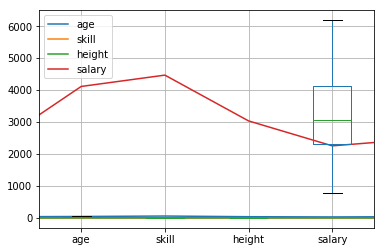

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
my_df.plot()
my_df.boxplot()

```Save the result as a csv```

In [0]:
my_df.to_csv()

',age,skill,height,salary\n1,36.0,0.38318785257486565,1.77,2345.4641435436033\n2,45.0,1.0,1.53,4113.6054443881185\n3,59.0,0.34573358773317053,1.72,4468.587131142124\n4,38.0,0.7020632615383995,1.63,3035.552338781611\n5,31.0,0.527808221409519,1.61,2255.0470630384107\n6,39.0,0.31990169417050784,1.72,2464.672912085597\n7,59.0,0.21344385741000882,1.56,4236.090890077986\n8,38.0,0.42765834234493233,1.64,2569.5817708787827\n9,62.0,0.2088863211785103,1.93,4578.496688093709\n10,28.0,0.7996016738611956,1.77,2541.3676397303643\n11,48.0,0.5152475261962443,2.0,3545.493268642106\n12,20.0,0.5237942830800819,1.97,1662.327799138921\n13,54.0,0.4917788048416051,1.89,4137.841501941455\n14,23.0,0.8913611226278095,1.84,2436.5502409482474\n15,26.0,0.4065541222694655,1.82,1761.4232815070684\n16,42.0,0.491818490032755,1.94,2977.702426222818\n17,41.0,0.0,1.53,2069.6054443881185\n18,35.0,0.0,1.84,1617.2363324809712\n19,42.0,0.6583847220125355,1.78,3280.70220197297\n20,61.0,0.0,1.76,4119.562588892397\n21,26.0,1.0,

## Working with real-life data

```read the csv file entitled house_prices_numeric.csv consider writing the following line of code:```
```python
pd.options.display.max_columns=50
```

In [0]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_numeric.csv')

```In the following questions, print your answer if possible, draw a graph or visualize it in any other means. When drawing a graph, add a title to it. Answer the following questions (try using a single line of code for each):```
```
- What is oldest house in the dataset (YearBuilt)?
- What is the highest price (SalePrice) of houses built in that year?
- What is the mean area (LotArea) of houses?
- What is the 50-percentile of the area (LotArea) of houses?
- What is more common: having a fireplace (Fireplaces) in the house, or not having one?
- What is the mean price (SalePrice) of houses that have swimming pools (PoolArea)?
- How many houses were sold every year (YrSold)? Draw a graph using plt.plot or pandas.plot
- What is the distribution of the overall condition of the houses (OverallCond)? Use plt.hist or pandas.hist
- For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
- Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is a multiple of 20. For each group compute the mean, max, min and standard deviation of OverallQual
```

In [0]:
print("Oldest house is " + str(df['YearBuilt'].idxmin() + 1))
print("Highest price is " + str(df['SalePrice'].idxmax() + 1))
print("Mean area is " + str(df['LotArea'].mean()))
print("Median area is " + str(df['LotArea'].median()))
if df.groupby(['Fireplaces']).size().loc[0] > df.groupby(['Fireplaces']).size().loc[1] + df.groupby(['Fireplaces']).size().loc[2] + df.groupby(['Fireplaces']).size().loc[3]:
  print('It is more common not to have a fireplace')
else:
  print('It is more common to have a fireplace')
print("Mean price of pool houses is " + str(df.groupby(['PoolArea']).mean()['SalePrice'].sum() - df.groupby(['PoolArea']).mean()['SalePrice'].loc[0].sum()))
# plt.plot(df.groupby(['YrSold']).count()['Id'])
# df['OverallCond'].hist()
grouped = df.groupby(['Fireplaces']).agg({'SalePrice':'mean', 'YearBuilt':'mean', 'FullBath':'count'})
grouped['YearBuilt'] = 2019 - grouped['YearBuilt']
grouped.rename({'YearBuilt':'Age'}, axis='columns')
print(grouped)
print(df[df['MSSubClass']  > 60].groupby(df['MSSubClass'] % 20 == 0).agg({'OverallQual':['mean', 'max','std']}))

Oldest house is 1350
Highest price is 692
Mean area is 10516.828082191782
Median area is 9478.5
It is more common to have a fireplace
Mean price of pool houses is 2016970.0000000002
            FullBath  YearBuilt      SalePrice
Fireplaces                                    
0                690  54.781159  141331.482609
1                650  39.150769  211843.909231
2                115  54.347826  240588.539130
3                  5  38.400000  252000.000000
           OverallQual              
                  mean max       std
MSSubClass                          
False         5.556180  10  1.193055
True          6.389908   9  1.111021


## Feature extraction

```Load the complete version of the houses table, entitled "house_prices_larger.csv"```

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_larger.csv')

```As you recall, the feature extraction process is done in order to let us describe the data in more "meaningful" manner. Add the following features to your dataframe:```
- ```LotArea in squared meters ( it's currently in units of squared feet)```
- ```1stFlrSF + 2ndFlrSF```
- ```GarageArea**0.5```
- ```LotArea / (BedroomAbvGr+1)```
- ```LotArea / (mean LotArea for houses built in that same year + 1e-5) - you might want to use``` [pandas merge function](https://www.google.com/search?q=pandas+merge&oq=pandas+merge&aqs=chrome..69i57l2j69i59l3j69i60.2080j0j9&sourceid=chrome&ie=UTF-8)
- ```Ranking of LotArea (largest house has 1, the second largest has 2 and so on)```
- ```One hot encoding of LotConfig - that is, add feature againts every value possible in LotConfig, which is 1 if the sample's LotConfig is this value and 0 otherwise (consider``` [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html))

```make a list of the names of the features you created.```

In [0]:
df['LotArea2'] = df['LotArea'] * 0.3048
df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF']
df['RootGarageArea'] = df['GarageArea']**0.5
df['AreaByBedroom'] = df['RootGarageArea']#df['LotArea'] / (df['BedroomAbvGr'] + 1)
df['AreaBySameYear'] = df['LotArea'] # (df.groupby(['YearBuilt']).mean())
df['AreaRank'] = (df.sort_values(by='LotArea2', ascending=True)).reset_index().index+1
df = df.merge(pd.get_dummies(df, prefix=['LotConfig']))
new_feat = ['LotArea2', 'TotalSF', 'RootGarageArea', 'AreaByBedroom', 'AreaBySameYear', 'AreaRank']
config = ['LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside']
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,TotalSF,RootGarageArea,AreaByBedroom,AreaBySameYear,AreaRank,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,1710,23.409400,23.409400,8450,1,0,0,0,0,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,1262,21.447611,21.447611,9600,2,0,0,1,0,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,1786,24.657656,24.657656,11250,3,0,0,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,1717,25.337719,25.337719,9550,4,1,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,2198,28.913665,28.913665,14260,5,0,0,1,0,0
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,1362,21.908902,21.908902,14115,6,0,0,0,0,1
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,1694,25.219040,25.219040,10084,7,0,0,0,0,1
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,2090,22.000000,22.000000,10382,8,1,0,0,0,0
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,1774,21.633308,21.633308,6120,9,0,0,0,0,1
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,1077,14.317821,14.317821,7420,10,1,0,0,0,0


## Simple linear model

```Next, we will train a simple linear model, as seen in class, to predict SalePrice. Use the features you computed. Create train and test segments, normalize the data (both the features and the target) and use a linear model. Make sure you don't somehow use the test data when training your model (or when normalizing your data).```

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

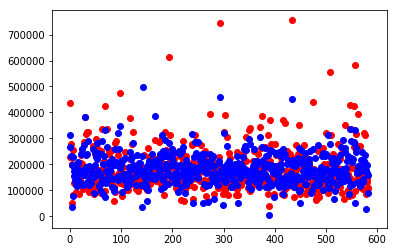

In [0]:

features_data = df[new_feat]
target = df['SalePrice']
data_train , data_test, target_train, target_test = train_test_split(features_data, target, test_size = 0.4)

StandardScaler(data_train)
StandardScaler(target_train)

lin_regressor = LinearRegression()
lin_regressor.fit(data_train,target_train)

price_target_fit = lin_regressor.predict(data_test)
price = np.array(target_test)
price_model = np.array(price_target_fit)

plt.scatter(range(len(price)), price, color ='r')

plt.scatter(range(len(price_model)), price_model, color ='b')

```Next, we will add extra features: for any feature you computed earlier, add feature**2 and feature**3. Now use Ridge regression (regularized linear regression, as we discussed in class). Draw graphs of the loss computed on the train and on the validation as a function of the regularization parameter, for``` 1$\leq\alpha\leq$30. ```What regularization would it be best to take?```

In [0]:
from sklearn.linear_model import Ridge
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_special.csv')

"\nfor i in range(30):\n    ridger = Ridge(alpha=i, normalize=True)\n    data_train , data_test, target_train, target_test = train_test_split(features_data, target, test_size = 0.3)\n    ridger = ridger.fit(data_train, target_train)\n    price_target_fit = ridger.predict(data_test)\n    price = np.array(target_test)\n    price_model = np.array(price_target_fit)\n    score.append(ridger.score(price_model, price))\n\n    plt.scatter(range(30), score, color ='r')\n"

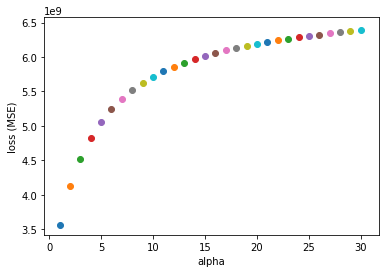

In [0]:
second = features_data**2
third = features_data**3

features_data2 = pd.concat([features_data, second], axis=1)
features_data3 = pd.concat([features_data, third], axis=1)
score = []

for i in range(1,31):
  ridgereg = Ridge(alpha=i, normalize=True)
  ridgereg.fit(data_train,target_train)
  test_target_pred = ridgereg.predict(data_test)
  plt.scatter(i,mean_squared_error(test_target_pred,target_test))
  plt.xlabel("alpha")
  plt.ylabel("loss (MSE)")